In [ ]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'breast-ultrasound-images-split:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3633996%2F6318423%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240724%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240724T052811Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D76ebc98fe9e0f195b8704965865005a9b177ca5068ddc8cec9ee8244b96e755e3aba1744d082c520cfb5110fcfb4e04e95f524a5b674a49df22f13bc056c4e30e5a707d7ef5d5565907979a6009198ee78809d9001622859965ccec04e3fded6cd2c6cafec8a95ec5971d5d40d6f8ff5c4ec301d9eed8373fd4536329a6f3ba37062fde7cd8cc1295a66f98336e031f8db960d69ddb2a0a9437d1756ed94e1bac31dad75fd4137872ae76d65cf49ab82e10969d18ba43ccf1b5eb6554d6d6c8b8d3ef32dd6f483fd7e0cb5fe000fc0dca9af54eb1c81ebb87f18b657648b35193af7d086f644394cf45e6263fcded72b9a0f4070c8692bea03fbbeb0071046e0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 203847368 bytes downloaded
Downloaded and uncompressed: breast-ultrasound-images-split
Data source import complete.


In [ ]:

import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/breast-ultrasound-images-split/breast-ultrasound-images-Split/validation/benign/benign (425).png
/kaggle/input/breast-ultrasound-images-split/breast-ultrasound-images-Split/validation/benign/benign (156).png
/kaggle/input/breast-ultrasound-images-split/breast-ultrasound-images-Split/validation/benign/benign (231).png
/kaggle/input/breast-ultrasound-images-split/breast-ultrasound-images-Split/validation/benign/benign (146).png
/kaggle/input/breast-ultrasound-images-split/breast-ultrasound-images-Split/validation/benign/benign (225).png
/kaggle/input/breast-ultrasound-images-split/breast-ultrasound-images-Split/validation/benign/benign (237).png
/kaggle/input/breast-ultrasound-images-split/breast-ultrasound-images-Split/validation/benign/benign (273).png
/kaggle/input/breast-ultrasound-images-split/breast-ultrasound-images-Split/validation/benign/benign (7).png
/kaggle/input/breast-ultrasound-images-split/breast-ultrasound-images-Split/validation/benign/benign (340).png
/ka

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 DataLoaders

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split


source_dir = '/kaggle/input/breast-ultrasound-images-dataset'

train_dir = '/kaggle/input/breast-ultrasound-images-split/breast-ultrasound-images-Split/train'
test_dir = '/kaggle/input/breast-ultrasound-images-split/breast-ultrasound-images-Split/test'



In [ ]:
#train_dir = "/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT"


In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

 DataLoaders

In [ ]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int=NUM_WORKERS
):


  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)


  class_names = train_data.classes


  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

In [ ]:

IMG_SIZE = 224

manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [ ]:
BATCH_SIZE = 32


train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7ac1e5edfe20>,
 ['benign', 'malignant', 'normal'])

torch.Size([3, 224, 224]) tensor(2)


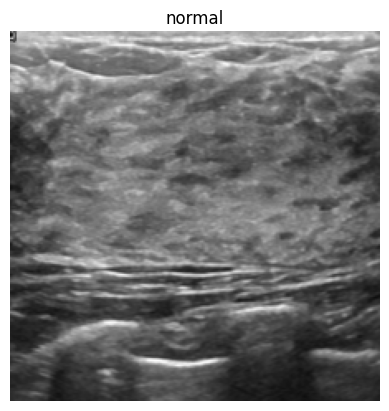

In [ ]:

image_batch, label_batch = next(iter(train_dataloader))

image, label = image_batch[0], label_batch[0]

print(image.shape, label)

plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False);

PatchEmbedding

In [ ]:

class PatchEmbedding(nn.Module):

    def __init__(self,
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()


        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

        self.flatten = nn.Flatten(start_dim=2,
                                  end_dim=3)


    def forward(self, x):

        image_resolution = x.shape[-1]
        assert image_resolution % patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {patch_size}"

        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)


        return x_flattened.permute(0, 2, 1)

In [ ]:

patch_size =16


def set_seeds(seed: int=42):

    torch.manual_seed(seed)

    torch.cuda.manual_seed(seed)



set_seeds()
patchify = PatchEmbedding(in_channels=3,
                          patch_size=16,
                          embedding_dim=768)
print(f"Input image shape: {image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0))
print(f"Output patch embedding shape: {patch_embedded_image.shape}")

Input image shape: torch.Size([1, 3, 224, 224])
Output patch embedding shape: torch.Size([1, 196, 768])


In [ ]:


print(patch_embedded_image)
print(f"Patch embedding shape: {patch_embedded_image.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[-0.8001,  0.1969, -0.2024,  ...,  0.5528, -0.3209,  0.2904],
         [-0.7583,  0.1835, -0.0761,  ...,  0.4701, -0.3274,  0.2421],
         [-0.7575,  0.2283,  0.0325,  ...,  0.5438, -0.4638,  0.0588],
         ...,
         [-0.1913,  0.0559, -0.0150,  ...,  0.1217, -0.0842, -0.0106],
         [-0.2118,  0.0150, -0.0518,  ...,  0.1615, -0.1030,  0.0590],
         [-0.1813,  0.0430, -0.0816,  ...,  0.1255, -0.0732,  0.0883]]],
       grad_fn=<PermuteBackward0>)
Patch embedding shape: torch.Size([1, 196, 768]) -> [batch_size, number_of_patches, embedding_dimension]


In [ ]:


set_seeds()

patch_size = 16

print(f"Image tensor shape: {image.shape}")
height, width = image.shape[1], image.shape[2]


x = image.unsqueeze(0)
print(f"Input image with batch dimension shape: {x.shape}")


patch_embedding_layer = PatchEmbedding(in_channels=3,
                                       patch_size=patch_size,
                                       embedding_dim=768)

patch_embedding = patch_embedding_layer(x)
print(f"Patching embedding shape: {patch_embedding.shape}")



batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True)
print(f"Class token embedding shape: {class_token.shape}")


patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")

number_of_patches = int((height * width) / patch_size**2)
position_embedding = nn.Parameter(torch.ones(1, number_of_patches+1, embedding_dimension),
                                  requires_grad=True)


patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")

print(patch_embedding_class_token)

Image tensor shape: torch.Size([3, 224, 224])
Input image with batch dimension shape: torch.Size([1, 3, 224, 224])
Patching embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])
Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768])
tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.8001,  0.1969, -0.2024,  ...,  0.5528, -0.3209,  0.2904],
         [-0.7583,  0.1835, -0.0761,  ...,  0.4701, -0.3274,  0.2421],
         ...,
         [-0.1913,  0.0559, -0.0150,  ...,  0.1217, -0.0842, -0.0106],
         [-0.2118,  0.0150, -0.0518,  ...,  0.1615, -0.1030,  0.0590],
         [-0.1813,  0.0430, -0.0816,  ...,  0.1255, -0.0732,  0.0883]]],
       grad_fn=<CatBackward0>)


 Transformer's encoder

In [ ]:

class MultiheadSelfAttentionBlock(nn.Module):


    def __init__(self,
                 embedding_dim:int=768,
                 num_heads:int=12,
                 attn_dropout:float=0):
        super().__init__()


        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)


        self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                    num_heads=num_heads,
                                                    dropout=attn_dropout,
                                                    batch_first=True)


    def forward(self, x):
        x = self.layer_norm(x)
        attn_output, _ = self.multihead_attn(query=x,
                                             key=x,
                                             value=x,
                                             need_weights=False)
        return attn_output

MLP Block

In [ ]:

class MLPBlock(nn.Module):


    def __init__(self,
                 embedding_dim:int=768,
                 mlp_size:int=3072,
                 dropout:float=0.1):
        super().__init__()


        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)


        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),
            nn.GELU(),
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size,
                      out_features=embedding_dim),
            nn.Dropout(p=dropout)
        )


    def forward(self, x):
        x = self.layer_norm(x)
        x = self.mlp(x)
        return x

combining our  layers

In [ ]:

class TransformerEncoderBlock(nn.Module):

    def __init__(self,
                 embedding_dim:int=768,
                 num_heads:int=12,
                 mlp_size:int=3072,
                 mlp_dropout:float=0.1,
                 attn_dropout:float=0):
        super().__init__()


        self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                     num_heads=num_heads,
                                                     attn_dropout=attn_dropout)


        self.mlp_block =  MLPBlock(embedding_dim=embedding_dim,
                                   mlp_size=mlp_size,
                                   dropout=mlp_dropout)


    def forward(self, x):


        x =  self.msa_block(x) + x


        x = self.mlp_block(x) + x

        return x


In [ ]:
!pip install torchinfo
from torchinfo import summary

Transformer Encoder block

In [ ]:
transformer_encoder_block = TransformerEncoderBlock()

from torchinfo import summary

summary(model=transformer_encoder_block,
        input_size=(1, 197, 768),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
       row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

vision transformer

In [ ]:

class ViT(nn.Module):

    def __init__(self,
                 img_size:int=224,
                 in_channels:int=3,
                 patch_size:int=16,
                 num_transformer_layers:int=12,
                 embedding_dim:int=768,
                 mlp_size:int=3072,
                 num_heads:int=12,
                 attn_dropout:float=0,
                 mlp_dropout:float=0.1,
                 embedding_dropout:float=0.1,
                 num_classes:int=1000):
        super().__init__()


        assert img_size % patch_size == 0, f"Image size must be divisible by patch size, image size: {img_size}, patch size: {patch_size}."


        self.num_patches = (img_size * img_size) // patch_size**2


        self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),
                                            requires_grad=True)


        self.position_embedding = nn.Parameter(data=torch.randn(1, self.num_patches+1, embedding_dim),
                                               requires_grad=True)


        self.embedding_dropout = nn.Dropout(p=embedding_dropout)


        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)


        self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                            num_heads=num_heads,
                                                                            mlp_size=mlp_size,
                                                                            mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])


        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim,
                      out_features=num_classes)
        )


    def forward(self, x):


        batch_size = x.shape[0]


        class_token = self.class_embedding.expand(batch_size, -1, -1)


        x = self.patch_embedding(x)


        x = torch.cat((class_token, x), dim=1)


        x = self.position_embedding + x


        x = self.embedding_dropout(x)


        x = self.transformer_encoder(x)


        x = self.classifier(x[:, 0])

        return x

In [ ]:

vit = ViT(num_classes=len(class_names))

In [ ]:
!ls pytorch-deep-learning/going_modular/going_modular/engine.py



ls: cannot access 'pytorch-deep-learning/going_modular/going_modular/engine.py': No such file or directory


In [ ]:
!ls /content/drive/MyDrive/going_modular


going_modular


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/going_modular')

In [ ]:
try:
    from going_modular import engine
    print("Module imported successfully!")
except ModuleNotFoundError as e:
    print(f"Error: {e}")

Module imported successfully!


In [ ]:
!pip install torch
import torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from going_modular import engine

Training Model

In [ ]:
from going_modular import engine


optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=3e-3,
                             betas=(0.9, 0.999),
                             weight_decay=0.3)


loss_fn = torch.nn.CrossEntropyLoss()


set_seeds()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=100,
                        device = device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.2798 | train_acc: 0.4388 | test_loss: 1.2577 | test_acc: 0.5625
Epoch: 2 | train_loss: 1.0906 | train_acc: 0.5152 | test_loss: 1.0279 | test_acc: 0.5625
Epoch: 3 | train_loss: 1.0044 | train_acc: 0.5433 | test_loss: 1.0264 | test_acc: 0.5625
Epoch: 4 | train_loss: 1.0043 | train_acc: 0.5630 | test_loss: 1.0059 | test_acc: 0.5625
Epoch: 5 | train_loss: 0.9716 | train_acc: 0.5767 | test_loss: 1.0243 | test_acc: 0.5625
Epoch: 6 | train_loss: 1.0001 | train_acc: 0.5705 | test_loss: 1.0136 | test_acc: 0.5625
Epoch: 7 | train_loss: 1.0146 | train_acc: 0.5630 | test_loss: 1.0192 | test_acc: 0.5625
Epoch: 8 | train_loss: 1.0466 | train_acc: 0.5548 | test_loss: 1.0544 | test_acc: 0.5625
Epoch: 9 | train_loss: 1.0273 | train_acc: 0.5649 | test_loss: 1.0278 | test_acc: 0.5625
Epoch: 10 | train_loss: 0.9876 | train_acc: 0.5686 | test_loss: 0.9861 | test_acc: 0.5625
Epoch: 11 | train_loss: 1.0038 | train_acc: 0.5668 | test_loss: 0.9798 | test_acc: 0.5625
Epoch: 12 | train_l

In [ ]:
import requests

# Import function to make predictions on images and plot them
from going_modular.going_modular.predictions import pred_and_plot_image

# Setup custom image path
custom_image_path = "test_img.jpg"

# Predict on custom image
pred_and_plot_image(model=vit,
                    image_path=custom_image_path,
                    class_names=class_names)

In [ ]:
torch.save(vit.state_dict(), "vit-base-patch16-224.pth")